# Project - Image Recognition using CascadeClassifier

---

## Part-1 Face Detection

### Importing libraries

In [307]:
import cv2
import matplotlib.pyplot as plt

### Loading a image

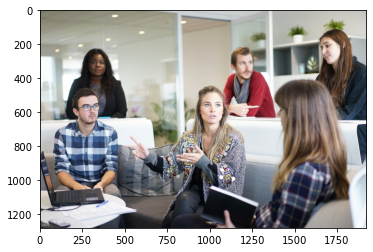

In [393]:
global_image = cv2.imread("dataset/people1.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
global_image = cv2.cvtColor(global_image, cv2.COLOR_BGR2RGB)
plt.imshow(global_image)
plt.show()

### Displaying pixel values of image

In [394]:
print(global_image)

[[[107 103  91]
  [118 114 102]
  [110 107  92]
  ...
  [193 192 187]
  [192 191 186]
  [191 190 185]]

 [[109 105  93]
  [113 109  97]
  [113 110  95]
  ...
  [193 192 187]
  [192 191 186]
  [191 190 185]]

 [[114 111  96]
  [114 111  96]
  [120 117 102]
  ...
  [192 191 186]
  [191 190 185]
  [190 189 184]]

 ...

 [[ 40  43  48]
  [ 38  41  46]
  [ 36  39  44]
  ...
  [244 248 251]
  [244 247 252]
  [243 246 251]]

 [[ 44  49  55]
  [ 42  47  53]
  [ 38  43  49]
  ...
  [244 248 251]
  [244 247 252]
  [244 247 252]]

 [[ 45  50  56]
  [ 43  48  54]
  [ 39  44  50]
  ...
  [245 249 252]
  [245 248 253]
  [245 248 253]]]


In [395]:
print("Dimensions of given image is: {}".format(global_image.shape))

Dimensions of given image is: (1280, 1920, 3)


**The resolution of given image is 1280x1920.<br>**
**We can reduce it by using 'cv2.resize()'**

In [396]:
# Resizing the image 
global_image = cv2.resize(global_image, (800, 600))

### Displaying new image

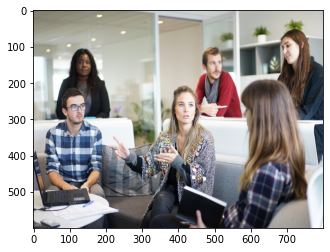

In [397]:
plt.imshow(global_image)
plt.show()

In [398]:
print("Dimensions of given image is: {}".format(global_image.shape))

Dimensions of given image is: (600, 800, 3)


### Converting the given image into gray scale

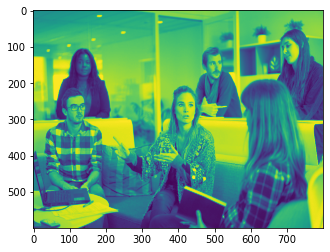

In [399]:
global_gray_img = cv2.cvtColor(global_image, cv2.COLOR_RGB2GRAY)

plt.imshow(global_gray_img)
plt.show()

In [400]:
print("Size of gray image is: {}".format(global_gray_img.shape))

Size of gray image is: (600, 800)


### Face model Cascade Classifier

In [401]:
# Loading face detector cascade file

face_detector = cv2.CascadeClassifier("cascade/haarcascade_frontalface_default.xml")
face_detector

<CascadeClassifier 0000018064946D50>

In [402]:
# Face detected co-ordinates

detects = face_detector.detectMultiScale(global_gray_img)
display(detects)

array([[115, 124,  53,  53],
       [475, 123,  59,  59],
       [390, 323,  56,  56],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [677,  72,  68,  68]], dtype=int32)

**The values in above array represents; x, y, width and height of the face detected region.**

In [403]:
print("Total faces detected: {}".format(len(detects)))

Total faces detected: 6


### Displaying face detected

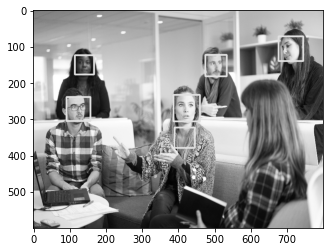

In [404]:
for i in range(len(detects)):
    temp = list(detects[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(global_gray_img, (x, y), (x + w, y + h), (225, 225, 225), 3)
    
temp2 = cv2.cvtColor((global_gray_img), cv2.COLOR_GRAY2RGB)
plt.imshow(temp2)

---

### Detecting face using color image

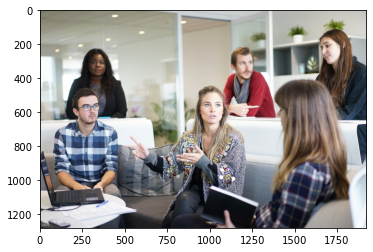

In [405]:
color_image = cv2.imread("dataset/people1.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.imshow(color_image)

**Original image with dimensions 573x1023.**

In [406]:
print("Size of color image is: {}".format(color_image.shape))

Size of color image is: (1280, 1920, 3)


### Resizing image

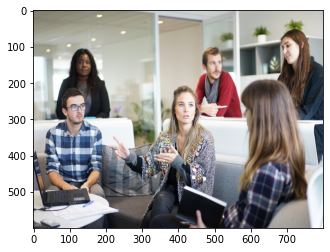

In [407]:
color_image = cv2.resize(color_image, (800, 600))
plt.imshow(color_image)
plt.show()

**Resized image with dimensions 800x600.**

In [408]:
# Increasing the sclae factor to 1.1, for better performance
# Using minimum neighbours to reduce false positive
# Using minSize and maxSize to ignore items below a minimum or above a maximum size

detect2 =  face_detector.detectMultiScale(color_image, scaleFactor = 1.1, minNeighbors=7,
                                          minSize=(20,20), maxSize=(100,100))
display(detect2)

array([[115, 123,  53,  53],
       [475, 123,  59,  59],
       [387, 232,  72,  72],
       [ 93, 238,  66,  66],
       [676,  71,  69,  69]], dtype=int32)

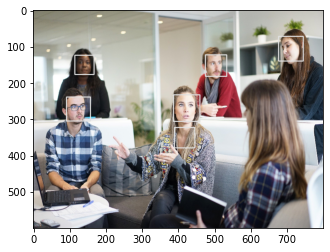

In [409]:
for i in range(len(detects)):
    temp = list(detects[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(color_image, (x, y), (x + w, y + h), (225, 225, 225), 2)
    
plt.imshow(color_image)

---

## Part-2 Eye Detector

In [410]:
eye_detector = cv2.CascadeClassifier("cascade/haarcascade_eye.xml")
eye_detector

<CascadeClassifier 000001806E7318B0>

### Loading image

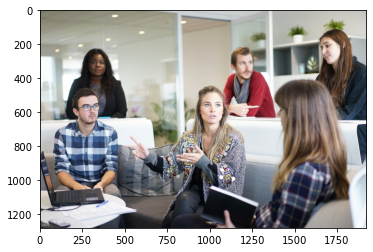

In [411]:
test_image = cv2.imread("dataset/people1.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()

In [412]:
print("Dimensions of given image is: {}".format(test_image.shape))

Dimensions of given image is: (1280, 1920, 3)


**Original image with dimensions 1280x1920.**

### Resizing image

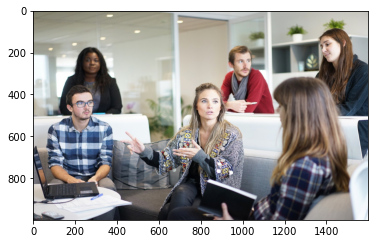

In [413]:
test_image = cv2.resize(test_image, (1600, 1000))
plt.imshow(test_image)
plt.show()

### Loading both Face and Eye detection models

### Using eye detection

In [414]:
face_detect_model = face_detector.detectMultiScale(test_image, scaleFactor = 1.1)
eye_detect_model = eye_detector.detectMultiScale(test_image, scaleFactor = 1.1, minNeighbors=10, maxSize=(60,60))

face_detect_model

array([[ 239,  204,   90,   90],
       [ 960,  204,  102,  102],
       [ 778,  383,  137,  137],
       [ 778,  524,  121,  121],
       [1364,  120,  118,  118],
       [ 192,  397,  117,  117],
       [  88,  614,   42,   42]], dtype=int32)

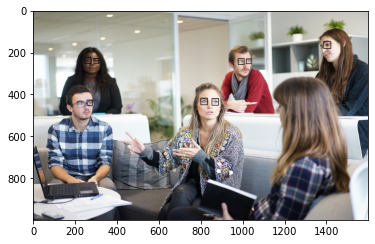

In [415]:
for i in range(len(eye_detect_model)):
    temp = list(eye_detect_model[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 0, 0), 2)
    
plt.imshow(test_image)
plt.show()

### Using eye detection and face detection at same time

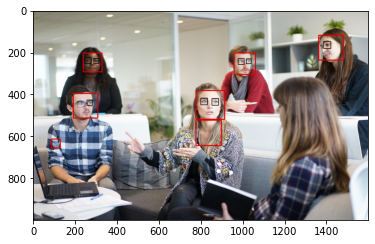

In [416]:
for i in range(len(eye_detect_model)):
    temp = list(eye_detect_model[i])
    x,y,w,h = temp[0], temp[1], temp[2], temp[3]
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 0, 0), 2)

for i2 in range(len(face_detect_model)):
    temp2 = list(face_detect_model[i2])
    x1,y1,w1,h1 = temp2[0], temp2[1], temp2[2], temp2[3]
    cv2.rectangle(test_image, (x1, y1), (x1 + w1, y1 + h1), (225, 0, 0), 3)
    
plt.imshow(test_image)
plt.show()

**Result of combining eye detection and face detection model together.<br>**
**The result is not 100% accurate, but it does its job very well.**

---

## Part-3 Car Detector

### Loading image

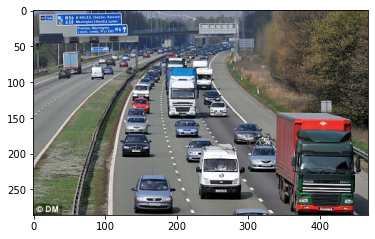

In [417]:
car_image = cv2.imread("dataset/car.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB)
plt.imshow(car_image)
plt.show()

In [418]:
print("Dimension of given image is: {}".format(car_image.shape))

Dimension of given image is: (286, 468, 3)


### Loading car detector cascade classifier model

In [419]:
car_detector = cv2.CascadeClassifier("cascade/cars.xml")
display(car_detector)

<CascadeClassifier 000001801D6E41B0>

### Using car detector model on test image

In [420]:
car_detects = car_detector.detectMultiScale(car_image)
print(car_detects)

[[294 187  56  56]
 [107 156  71  71]
 [192 145  46  46]]


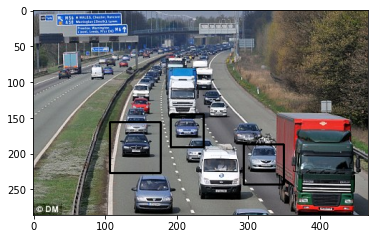

In [421]:
for i in range(len(car_detects)):
    temp = list(car_detects[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(car_image, (x, y), (x + w, y + h), (0, 0, 0), 2)
    
plt.imshow(car_image)
plt.show()

**This model did not work well. It was only to recognise handful of cars out of many.**

---

## Part-4 Clock Detection

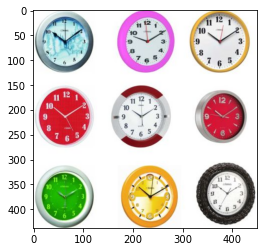

In [422]:
clock_image = cv2.imread("dataset/clock.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
clock_image = cv2.cvtColor(clock_image, cv2.COLOR_BGR2RGB)
plt.imshow(clock_image)
plt.show()

In [423]:
print("Dimension of given image is: {}".format(clock_image.shape))

Dimension of given image is: (438, 450, 3)


### Loading clock detector cascade classifier model

In [424]:
clock_detector = cv2.CascadeClassifier("cascade/clocks.xml")
display(clock_detector)

<CascadeClassifier 000001801C967EB0>

### Using clock detector model on test image

In [425]:
clock_detects = clock_detector.detectMultiScale(clock_image)
display(clock_detects)

array([[174, 167,  87,  87],
       [342, 320,  94,  94],
       [179,  13,  99,  99],
       [ 14,  17, 101, 101],
       [320,   7, 111, 111]], dtype=int32)

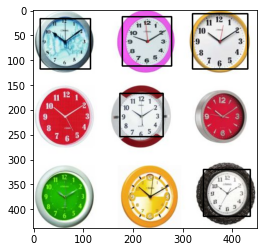

In [426]:
for i in range(len(clock_detects)):
    temp = list(clock_detects[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(clock_image, (x, y), (x + w, y + h), (0, 0, 0), 2)
    
plt.imshow(clock_image)
plt.show()

**This model did its job just fine. It was able to recognise more than half of given test subjects.**

---

## Part-5 Full Body Detector

### Loading image

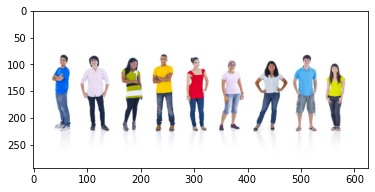

In [427]:
full_image = cv2.imread("dataset/people3.jpg")

# Since cv2 reads colors in BGR, and our given image is in RGB, we convert BGR form to RGB
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
plt.imshow(full_image)

In [428]:
print("Dimension of given image is: {}".format(full_image.shape))

Dimension of given image is: (294, 626, 3)


### Loading Full body detector cascade classifier model

In [429]:
full_detector = cv2.CascadeClassifier("cascade/fullbody.xml")
display(full_detector)

<CascadeClassifier 000001801B83B1F0>

### Using full body detection model

In [430]:
full_detects = full_detector.detectMultiScale(full_image, scaleFactor=1.1)
display(full_detects)

array([[198,  49,  90, 180],
       [462,  65,  90, 180],
       [430, 166,  34,  68],
       [142,  65,  80, 160],
       [324,  70,  88, 175],
       [267,  83,  74, 149],
       [ 71,  60,  93, 185],
       [541, 145,  46,  93],
       [530, 100,  69, 138],
       [ 35, 166,  46,  92]], dtype=int32)

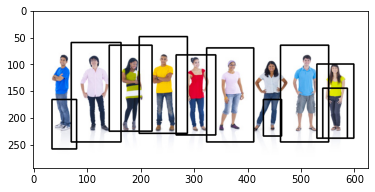

In [431]:
for i in range(len(full_detects)):
    temp = list(full_detects[i])
    x = temp[0]
    y = temp[1]
    w = temp[2]
    h = temp[3]
    cv2.rectangle(full_image, (x, y), (x + w, y + h), (0, 0, 0), 2)
    
plt.imshow(full_image)
plt.show()

**The model works very well, and recognised almost all of the test subjects.**

---